# Obtaining fire-negative locations

Locations where fires did not occur, with an overall similar distribution of Wildfire Hazard Potential (WHP) to the fire-positive locations.

## Wildfire dataset

National Intragency Fire Center:
- Historical wildfires: https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

In [1]:
# from google.colab import drive
# import os

# drive.mount('/content/drive')
# base_dir = 'drive/MyDrive/Senior Year/ML & Climate/ML-Climate-Final-Project-Template/src'
# os.chdir(base_dir)

## WHP dataset 

Dillon, Gregory K; Gilbertson-Day, Julie W. 2020. Wildfire Hazard Potential for the United States (270-m), version 2020. 3rd Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2015-0047-3

The data presented here are the product of modeling, and as such carry an inherent degree of error and uncertainty. Users are strongly encouraged to read and fully comprehend the metadata and other available documentation prior to data use. No warranty is made by the Originator as to the accuracy, reliability, or completeness of these data for individual use or aggregate use with other data, or for purposes not intended by the Originator. These datasets are intended to provide nationally-consistent information for the purpose of comparing relative wildfire risk among communities nationally or within a state or county. Data included here are not intended to replace locally-calibrated state, regional, or local risk assessments where they exist. It is the responsibility of the user to be familiar with the value, assumptions, and limitations of these national data publications. Managers and planners must evaluate these data according to the scale and requirements specific to their needs. Spatial information may not meet National Map Accuracy Standards. This information may be updated without notification.

In [1]:
import rasterio

raster_summer2021_path = "data/RawData/2021_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/emodis-wfpi-forecast-1_data_20210710_20210710/emodis-wfpi_data_20210710_20210710.tiff"
raster_summer2021 = rasterio.open(raster_summer2021_path)

In [2]:
import numpy as np

raster_summer2021_arr = raster_summer2021.read()
raster_summer2021_arr_valid = raster_summer2021_arr[raster_summer2021_arr<200]
np.mean(raster_summer2021_arr_valid), np.std(raster_summer2021_arr_valid)

(41.82572444794226, 33.185456555666214)

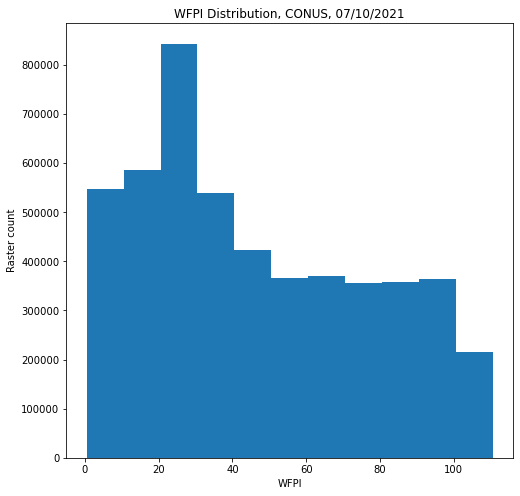

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.hist(raster_summer2021_arr_valid, bins=[x+0.5 for x in range(0,120,10)])
plt.title("WFPI Distribution, CONUS, 07/10/2021")
plt.xlabel('WFPI')
plt.ylabel('Raster count');

In [4]:
import fiona 
import geopandas as gpd
import pandas as pd
import contextily as cx
import datetime

path_to_data = "data/RawData/NIFC_Wildland_Fire_Perimeters.gdb"
fires_gdf = gpd.read_file(path_to_data)
fires_gdf

,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,EstimatedCostToDate,FinalFireReportApprovedByTitle,...,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID,geometry
0,None,CERTIFIED,50.64,2020-08-06T23:13:07+00:00,2020-08-06T23:13:24+00:00,50.6,20.0,MTMCC,NaN,None,...,None,None,2020-08-06T19:50:29+00:00,2020-08-12T20:46:01+00:00,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29},NaN,None,None,POINT (-104.45751 45.78504)
1,None,DEFAULT,NaN,None,None,NaN,0.1,CALACC,NaN,None,...,None,None,2020-02-28T20:52:36+00:00,2020-02-28T20:52:36+00:00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,None,None,POINT (-118.18071 33.80898)
2,None,DEFAULT,NaN,2017-10-18T00:30:00+00:00,2017-10-18T00:35:00+00:00,50.0,50.0,MTKIC,NaN,None,...,None,None,2017-10-18T13:46:40+00:00,2017-11-09T22:08:19+00:00,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533},NaN,None,None,POINT (-114.83541 48.07395)
3,None,DEFAULT,NaN,None,None,NaN,NaN,CAMVIC,NaN,None,...,None,None,2019-07-01T20:10:12+00:00,2019-07-01T20:10:12+00:00,IRWIN,{5DF06F41-9948-49D3-B00A-2D3A1D1049C5},NaN,None,None,POINT (-117.15390 33.17639)
4,None,DEFAULT,NaN,None,None,NaN,NaN,None,NaN,None,...,None,None,2016-06-20T22:39:02+00:00,2016-06-20T22:39:02+00:00,IRWIN,{F378818E-D541-4E0A-9A44-C81886C2B8B4},NaN,None,None,POINT (-121.10418 38.83473)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212233,None,DEFAULT,NaN,None,None,NaN,NaN,SDGPC,NaN,None,...,None,None,2022-03-21T13:24:39+00:00,2022-03-21T13:24:39+00:00,IRWIN,{C15A3B09-A767-40FB-8404-DFA2CBC0F42F},0.0,None,None,POINT (-99.45001 44.06140)
212234,None,DEFAULT,NaN,None,None,1.0,1.0,ILILC,NaN,None,...,None,None,2022-03-21T13:29:12+00:00,2022-03-21T13:46:28+00:00,IRWIN,{054AFEB9-7BAF-425E-B528-2E6C436547D0},0.0,None,None,POINT (-88.03056 41.37154)
212235,None,DEFAULT,NaN,None,None,1.0,1.0,ILILC,NaN,None,...,None,None,2022-03-21T13:36:34+00:00,2022-03-21T13:48:06+00:00,IRWIN,{9F4846CC-07EC-4D84-9D37-DD016F11A502},0.0,None,None,POINT (-88.15883 41.34809)
212236,None,DEFAULT,NaN,None,None,1.0,1.0,ILILC,NaN,None,...,None,None,2022-03-21T13:39:35+00:00,2022-03-21T13:48:28+00:00,IRWIN,{A2794C09-838A-4434-97F4-9E82289DDC18},0.0,None,None,POINT (-88.16037 41.35492)


In [5]:
fires_gdf['discovery_date'] = pd.to_datetime(fires_gdf['FireDiscoveryDateTime']).dt.tz_localize(None)
fires_gdf = fires_gdf[(fires_gdf['POOState']!='US-AK')&(fires_gdf['POOState']!='US-HI')]

In [6]:
fires_rasterproj = fires_gdf.to_crs('PROJCS["Sphere_ARC_INFO_Lambert_Azimuthal_Equal_Area",GEOGCS["GCS_Sphere_ARC_INFO",DATUM["D_Sphere_ARC_INFO",SPHEROID["Sphere_ARC_INFO",6370997,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",45],PARAMETER["longitude_of_center",-100],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
summer_2021_fires = fires_rasterproj[(fires_rasterproj['discovery_date'] > datetime.datetime(year=2021,month=7,day=1)) & (fires_rasterproj['discovery_date'] > datetime.datetime(year=2021,month=7,day=31))]

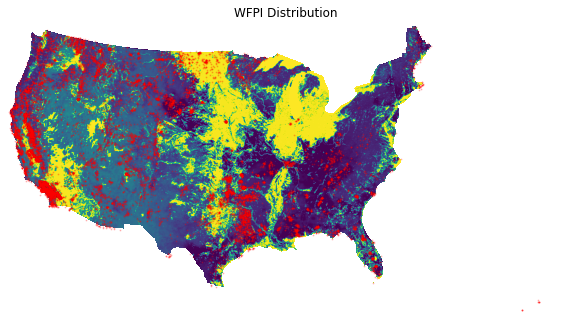

In [8]:
from rasterio.plot import plotting_extent, show
import rioxarray as rxr

fig, ax = plt.subplots(figsize=(10, 10))
rasterio_summer2021 = rxr.open_rasterio(raster_summer2021_path, masked=True).squeeze()

show(raster_summer2021, 
     title="WHP, CONUS, 07/10/2021 vs. Summer 2021 Wildfire Occurences", ax=ax)
plt.title("WFPI Distribution")
summer_2021_fires.plot(ax=ax,
              marker='o',
              markersize=1,
              alpha=0.2,
              color='red')
ax.set_axis_off()
plt.show()

In [9]:
post_2017_fire_count = len(fires_rasterproj[(fires_rasterproj['discovery_date'] > datetime.datetime(year=2017,month=1,day=1))])
post_2017_fire_count

157179

In [12]:
fire_hazards = {}
missing_data_count = 0
for i_year in range(2017, 2023):
    fires_year_rasterproj = fires_rasterproj[(fires_rasterproj['discovery_date'] > datetime.datetime(year=i_year,month=1,day=1)) & (fires_rasterproj['discovery_date'] < datetime.datetime(year=i_year+1,month=1,day=1))]
    fire_coord_list = [(fire_id, date, (x,y)) for fire_id, date, x, y in zip(fires_year_rasterproj['UniqueFireIdentifier'], fires_year_rasterproj['discovery_date'], \
                                                                             fires_year_rasterproj['geometry'].x, fires_year_rasterproj['geometry'].y)]
    date_coord_map = {discovery_date.date():{'ids':[], 'coords':[]} for _, discovery_date, _ in fire_coord_list}
    for fire_id, discovery_date, coord in fire_coord_list:
        date_coord_map[discovery_date.date()]['ids'].append(fire_id)
        date_coord_map[discovery_date.date()]['coords'].append(coord)
    for date in date_coord_map:
        id_list_date = date_coord_map[date]['ids']
        coord_list_date = date_coord_map[date]['coords']
        date_str = date.strftime("%Y%m%d") 
        if i_year == 2018 or i_year == 2022 or (i_year == 2021 and date.month >=6): 
            folder_name = "emodis-wfpi-forecast-1_data_{}_{}".format(date_str,date_str)
            data_name = "emodis-wfpi_data_{}_{}".format(date_str,date_str)
            raster_path_date = "data/RawData/{}_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/{}/{}.tiff".format(i_year, folder_name, data_name)
        else:
            folder_name = "emodis_wfpi_data_{}_{}".format(date_str,date_str)
            data_name = "emodis_wfpi_data_{}_{}".format(date_str,date_str)
            raster_path_date = "data/RawData/{}_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/{}.tiff".format(i_year, folder_name, data_name)
        try:
            raster_date = rasterio.open(raster_path_date)
            fire_hazards_date = [x[0] for x in raster_date.sample(coord_list_date)]
            for fire_id, fire_hazard in zip(id_list_date, fire_hazards_date):
                fire_hazards[fire_id] = fire_hazard
        except Exception as e:
            print(e)
            missing_data_count += len(coord_list_date)
print('WFPI identified for {}/{} fires'.format(post_2017_fire_count-missing_data_count, post_2017_fire_count))

data/RawData/2020_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/emodis_wfpi_data_20200229_20200229.tiff: No such file or directory
WFPI identified for 157051/157179 fires


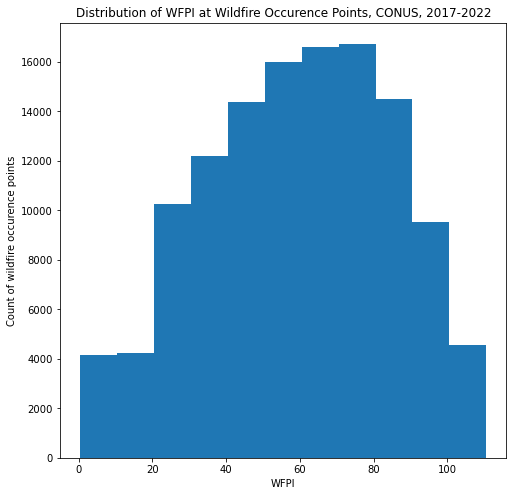

In [13]:
plt.figure(figsize=(8, 8))
plt.hist(fire_hazards.values(), bins=[x+0.5 for x in range(0,120,10)])
plt.title("Distribution of WFPI at Wildfire Occurence Points, CONUS, 2017-2022")
plt.xlabel('WFPI')
plt.ylabel('Count of wildfire occurence points');

In [72]:
import random

fires_wfpi = {}
missing_data_count = 0
for i_year in range(2017, 2023):
    fires_year_rasterproj = fires_rasterproj[(fires_rasterproj['discovery_date'] > datetime.datetime(year=i_year,month=1,day=1)) & (fires_rasterproj['discovery_date'] < datetime.datetime(year=i_year+1,month=1,day=1))]
    fire_coord_list = [(fire_id, date, (x,y)) for fire_id, date, x, y in zip(fires_year_rasterproj['UniqueFireIdentifier'], fires_year_rasterproj['discovery_date'], \
                                                                             fires_year_rasterproj['geometry'].x, fires_year_rasterproj['geometry'].y)]
    date_coord_map = {discovery_date.date():{'ids':[], 'coords':[]} for _, discovery_date, _ in fire_coord_list}
    for fire_id, discovery_date, coord in fire_coord_list:
        date_coord_map[discovery_date.date()]['ids'].append(fire_id)
        date_coord_map[discovery_date.date()]['coords'].append(coord)
    for date in date_coord_map:
        id_list_date = date_coord_map[date]['ids']
        coord_list_date = date_coord_map[date]['coords']
        date_str = date.strftime("%Y%m%d") 
        if i_year == 2018 or i_year == 2022 or (i_year == 2021 and date.month >=6): 
            folder_name = "emodis-wfpi-forecast-1_data_{}_{}".format(date_str,date_str)
            data_name = "emodis-wfpi_data_{}_{}".format(date_str,date_str)
            raster_path_date = "data/RawData/{}_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/{}/{}.tiff".format(i_year, folder_name, data_name)
        else:
            folder_name = "emodis_wfpi_data_{}_{}".format(date_str,date_str)
            data_name = "emodis_wfpi_data_{}_{}".format(date_str,date_str)
            raster_path_date = "data/RawData/{}_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/{}.tiff".format(i_year, folder_name, data_name)
        try:
            raster_date = rasterio.open(raster_path_date)
            transform_date = raster_date.transform
            fire_hazards_date = [x[0] for x in raster_date.sample(coord_list_date)]
            raster_arr_date = raster_date.read()[0]
            for fire_id, fire_hazard in zip(id_list_date, fire_hazards_date):
                diff_arr_fire = np.abs(raster_arr_date - fire_hazard)
                min_diff = np.min(diff_arr_fire)
                min_diff_indices = np.where(diff_arr_fire==min_diff)
                # I eventually need to make sure there isn't a fire at the following point 
                random_sample_rc = random.choice(list(zip(min_diff_indices[0],min_diff_indices[1])))
                random_sample_coords = raster_date.xy(*random_sample_rc)
                fires_wfpi[fire_id] = [fire_hazard, random_sample_coords]
        except Exception as e:
            print(e)
            missing_data_count += len(coord_list_date)
print('WFPI identified for {}/{} fires'.format(post_2017_fire_count-missing_data_count, post_2017_fire_count))

data/RawData/2020_Wind-enhanced_Fire_Potential_Index_Forecast_1_DATA/emodis_wfpi_data_20200229_20200229.tiff: No such file or directory
WFPI identified for 157051/157179 fires


In [100]:
fire_hazards_list = []
random_sample_list_x = []
random_sample_list_y = []
for unique_id in fires_gdf['UniqueFireIdentifier']:
    if unique_id in fires_wfpi:
        fire_hazard, coord = fires_wfpi[unique_id]
        fire_hazards_list.append(fire_hazard)
        random_sample_list_x.append(coord[0])
        random_sample_list_y.append(coord[1])
    else:
        fire_hazards_list.append(None)
        random_sample_list_x.append(None)
        random_sample_list_y.append(None)
fires_gdf['WFPI'] = fire_hazards_list
fires_gdf['RandomSampleXCoord'] = random_sample_list_x
fires_gdf['RandomSampleYCoord'] = random_sample_list_y

/Users/beccaroskill/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [101]:
random_samples_data = list(zip(fires_gdf['UniqueFireIdentifier'], fires_gdf['discovery_date'], fire_hazards_list, random_sample_list_x, random_sample_list_y))
random_samples_df = pd.DataFrame(random_samples_data, columns=['CorrespondingUniqueFireIdentifier', 'discovery_date', 'WFPI', 'XCoord', 'YCoord'])

In [102]:
random_samples_df.to_csv('data/ProcessedData/RandomSamplePoints.csv')

In [103]:
random_samples_df = random_samples_df[~np.isnan(random_samples_df['WFPI'])]

In [104]:
random_samples_df.to_csv('data/ProcessedData/RandomSamplePoints_Valid.csv')

In [ ]:
def nearest_fire_occurence(random_sample):
    x_coord = random_sample['XCoord']    
    y_coord = random_sample['YCoord']
    random_sample_point = Point(random_sample['XCoord'], random_sample['YCoord'])
    date = random_sample['discovery_date']
    recent_date_min, recent_date_max = (random_sample['discovery_date']-datetime.timedelta(days=20),
                                        random_sample['discovery_date']+datetime.timedelta(days=10))
    recent_fires = fires_rasterproj[(fires_rasterproj['discovery_date']>=recent_date_min)&(fires_rasterproj['discovery_date']<=recent_date_max)]
    min_dist = float('inf')
    for i, recent_fire in recent_fires.iterrows():
        fire_geom = recent_fire['geometry']
        dist = fire_geom.distance(random_sample_point)
        if dist < min_dist:
            min_dist = dist
    return min_dist

min_dist_list = []
for i, row in random_samples_df.iterrows():
    min_dist = near_fire_occurence(row)
    min_dist_list.append(min_dist)

In [ ]:
random_samples_df['RecentFireMinDist'] = min_dist_list
random_samples_df.to_csv('data/ProcessedData/RandomSamplePoints_Valid_RecentFireMinDist.csv')